In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/kuldeepsingharya/english-to-hindi-parallel-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aryan7004
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kuldeepsingharya/english-to-hindi-parallel-dataset


100%|██████████| 18.5M/18.5M [00:00<00:00, 53.2MB/s]


In [4]:
import numpy as np
import pandas as pd
import re
import string
from string import digits
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/english-to-hindi-parallel-dataset/newdata.csv')

In [6]:
df = df[:50000]

In [7]:
len(df)

50000

In [8]:
df.head()

,Unnamed: 0,english_sentence,hindi_sentence
0,0,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,1,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,2,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,3,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,4,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [9]:
def lower(text):
  text = str(text)
  return text.lower()

In [10]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [11]:
remove = string.punctuation
remove_num = str.maketrans('','',digits)
def preprocessing(text,language):
  if language=='English':
    text = ' '.join(contractions[word] if word in contractions else word for word in text.split())
  text = re.sub("'","",text)
  text = ''.join(ch for ch in text if ch not in remove)
  text = text.translate(remove_num)
  text = text.strip()
  return text

In [12]:
df['english_sentence'] = df['english_sentence'].apply(lower)
df['hindi_sentence'] = df['hindi_sentence'].apply(lower)

In [13]:
df['english_sentence'] = df['english_sentence'].apply(lambda x:preprocessing(x,'English'))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x:preprocessing(x,'Hindi'))

In [14]:
df.head()

,Unnamed: 0,english_sentence,hindi_sentence
0,0,politicians do not have permission to do what ...,राजनीतिज्ञों के पास जो कार्य करना चाहिए वह करन...
1,1,i would like to tell you about one such child,मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहूंगी
2,2,this percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,3,what we really mean is that they are bad at no...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,4,the ending portion of these vedas is called up...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [15]:
en_sen = df['english_sentence'].to_numpy()
hi_sen = df['hindi_sentence'].to_numpy()
valid_split = 0.1
valid_len = int(len(df)*valid_split)
train_en = en_sen[:-valid_len]
train_hi = hi_sen[:-valid_len]
valid_en = en_sen[-valid_len:]
valid_hi = hi_sen[-valid_len:]

In [16]:
def create_sen_tar(en_sen,hi_sen):
  return (en_sen,b"sos "+hi_sen),hi_sen+b" eos"

In [17]:
def create_dataset_from_sen(en_sen,
                            hi_sen,
                            batch_size=32,
                            cache=True,
                            shuffle=False,
                            shuffle_size = 10_000):
  dataset = tf.data.Dataset.from_tensor_slices((en_sen,hi_sen))
  dataset = dataset.map(create_sen_tar,num_parallel_calls = tf.data.AUTOTUNE)
  if cache:
    datatset = dataset.cache()
  if shuffle:
    dataset = dataset.shuffle(shuffle_size)
  return dataset.batch(batch_size)

In [18]:
train_ds = create_dataset_from_sen(train_en,train_hi)
valid_ds = create_dataset_from_sen(valid_en,valid_hi)

In [19]:
@keras.saving.register_keras_serializable()
class PositionalEncoding(layers.Layer):

  def __init__(
      self,max_sentence_len = 50,embedding_size = 256, dtype = tf.float32, **kwargs
      ):
    super().__init__(dtype = dtype,**kwargs)
    if embedding_size %2!=0:
      raise ValueError("embedding_size must be even")
    p,i = np.meshgrid(np.arange(max_sentence_len),np.arange(embedding_size//2))
    pos_emb = np.empty((1,max_sentence_len,embedding_size))
    pos_emb[:,:,0::2] = np.sin(p/10_000**(2*i/embedding_size)).T
    pos_emb[:,:,1::2] = np.cos(p/10_000**(2*i/embedding_size)).T
    self.positional_embedding = tf.constant(pos_emb.astype(self.dtype))
    self.supports_masking = True

  def call(self, inputs):
    batch_max_length = tf.shape(inputs)[1]
    return inputs + self.positional_embedding[:, :batch_max_length]

  def get_config(self):
      config = super().get_config()
      config.update({
            'dtype' : self.dtype,
      })
      return config

In [20]:
@keras.saving.register_keras_serializable()
class Encoder(layers.Layer):

  def __init__(
      self,embedding_size = 256, n_attention_heads = 8,n_units_dense = 256, dropout_rate = 0.2,**kwargs
      ):
    super().__init__(**kwargs)
    self.multi_head_attention = layers.MultiHeadAttention(n_attention_heads, embedding_size, dropout = dropout_rate)
    self.feed_forward = keras.Sequential(
        [
            layers.Dense(n_units_dense, activation = "relu", kernel_initializer = "he_normal"),
            layers.Dense(embedding_size, kernel_initializer= "he_normal")
        ]
    )
    self.add = layers.Add()
    self.normalization = layers.LayerNormalization()

  def call(self,inputs,mask=None):
      Z= inputs
      skip_z = Z
      Z = self.multi_head_attention(Z,value = Z,attention_mask = mask)
      Z = self.normalization(self.add([Z,skip_z]))
      skip_z = Z

      Z = self.feed_forward(Z)
      Z = self.normalization(self.add([Z,skip_z]))
      return Z
  def get_config(self):
      config = super().get_config()
      config.update({
            'multi_head_attention': self.multi_head_attention,
            'feed_forward': self.feed_forward,
            'add': self.add,
            'normalization': self.normalization,
      })
      return config

In [21]:
@keras.saving.register_keras_serializable()
class Decoder(layers.Layer):

  def __init__(
      self,embedding_size = 256,n_attention_head = 8,n_units_dense = 256,dropout_rate = 0.2,**kwargs
      ):
    super().__init__(**kwargs)
    self.masked_multi_head_attention = layers.MultiHeadAttention(n_attention_head,embedding_size,dropout = dropout_rate)
    self.multi_head_attention = layers.MultiHeadAttention(n_attention_head, embedding_size, dropout = dropout_rate)
    self.normalization = layers.Normalization()
    self.add = layers.Add()
    self.feed_forward = keras.Sequential(
        [
            layers.Dense(n_units_dense,activation = "relu",kernel_initializer = "he_normal"),
            layers.Dense(embedding_size,kernel_initializer = "he_normal"),
            layers.Dropout(dropout_rate),
        ]
        )
  def call(self,inputs,mask=None):
    decoder_mask, encoder_mask = mask
    Z, encoder_output = inputs
    Z_skip = Z
    Z = self.masked_multi_head_attention(Z,value=Z,attention_mask = decoder_mask)
    Z = self.normalization(self.add([Z_skip,Z]))
    Z_skip = Z
    Z = self.multi_head_attention(Z,value = encoder_output,attention_mask = encoder_mask)
    Z = self.normalization(self.add([Z,Z_skip]))
    Z_skip = Z
    Z = self.feed_forward(Z)
    Z = self.normalization(self.add([Z_skip,Z]))
    return Z
  def get_config(self):
      config = super().get_config()
      config.update({
            'masked_multi_head_attention': self.masked_multi_head_attention,
            'multi_head_attention': self.multi_head_attention,
            'normalization': self.normalization,
            'add': self.add,
            'feed_forward' : self.feed_forward,
      })
      return config

In [22]:
@keras.saving.register_keras_serializable()
class Transformer(keras.Model):
  def __init__(
      self,
      vocabulary_size = 55000,
      max_sentence_len = 50,
      embedding_size = 256,
      n_encoder_decoder_blocks = 1,
      n_attention_heads = 8,
      n_units_dense = 256,
      dropout_rate = 0.2,
      **kwargs
  ):
   super().__init__(**kwargs)
   self.max_sentence_len = max_sentence_len
   self.tokenizer_en = layers.TextVectorization(vocabulary_size,output_sequence_length = max_sentence_len)
   self.tokenizer_hn = layers.TextVectorization(vocabulary_size,output_sequence_length = max_sentence_len)
   self.encoder_embedding = layers.Embedding(
      vocabulary_size,embedding_size, mask_zero = True
   )
   self.decoder_embedding = layers.Embedding(
      vocabulary_size, embedding_size, mask_zero = True
   )
   self.positional_encoding = PositionalEncoding(max_sentence_len,embedding_size)
   self.encoder_blocks = [
      Encoder(embedding_size,n_attention_heads,n_units_dense,dropout_rate)
      for _ in range(n_encoder_decoder_blocks)
   ]
   self.decoder_blocks = [
      Decoder(embedding_size,n_attention_heads,n_units_dense,dropout_rate)
      for _ in range(n_encoder_decoder_blocks)
   ]
   self.output_layer = layers.Dense(vocabulary_size,activation = 'softmax')

  def call(self,inputs):
   encoder_inputs, decoder_inputs = inputs

   encoder_input_ids = self.tokenizer_en(encoder_inputs)
   decoder_input_ids = self.tokenizer_hn(decoder_inputs)

   encoder_embeddings = self.encoder_embedding(encoder_input_ids)
   decoder_embeddings = self.decoder_embedding(decoder_input_ids)

   encoder_pos_embeddings = self.positional_encoding(encoder_embeddings)
   decoder_pos_embeddings = self.positional_encoding(decoder_embeddings)

   encoder_pad_mask = tf.math.not_equal(encoder_input_ids,0)[:,tf.newaxis]
   decoder_pad_mask = tf.math.not_equal(decoder_input_ids,0)[:,tf.newaxis]
   batch_max_len_decoder = tf.shape(decoder_embeddings)[1]
   decoder_casual_mask = tf.linalg.band_part(tf.ones((batch_max_len_decoder, batch_max_len_decoder),tf.bool),-1,0)

   decoder_mask = decoder_casual_mask & decoder_pad_mask

   Z = encoder_pos_embeddings
   for encoder_block in self.encoder_blocks:
     Z = encoder_block(Z,mask = encoder_pad_mask)
   encoder_output = Z
   Z = decoder_pos_embeddings
   for decoder_block in self.decoder_blocks:
     Z = decoder_block(
        [Z, encoder_output], mask = [decoder_mask, encoder_pad_mask]
    )
   Z = self.output_layer(Z)
   return Z

  def get_config(self):
    config = super().get_config()
    config.update({
          'tokenizer_en': self.tokenizer_en,
          'tokenizer_hn': self.tokenizer_hn,
          'encoder_embedding': self.encoder_embedding,
          'decoder_embedding': self.decoder_embedding,
          'positional_encoding':self.positional_encoding,
          'encoder_blocks': self.encoder_blocks,
          'decoder_blocks': self.decoder_blocks,
          'output_layer': self.output_layer
    })
    return config

In [23]:
transformer_model = Transformer(max_sentence_len=60)

In [24]:
def adapts_compile_fit(model,
                       train_data,
                       valid_data,
                       n_epochs = 40,
                       n_patience = 15,
                       init_lr = 0.001,
                       lr_decay_rate = 0.1):
  model.tokenizer_en.adapt(train_data.map(lambda sentence,target:sentence[0],num_parallel_calls = tf.data.AUTOTUNE,))
  model.tokenizer_hn.adapt(train_data.map(lambda sentence,target:sentence[1]+b" eos",num_parallel_calls = tf.data.AUTOTUNE))

  train_data_prepared = train_data.map(
        lambda sentences, target: (sentences,model.tokenizer_hn(target)),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

  valid_data_prepared = valid_data.map(
        lambda sentences, target: (sentences,model.tokenizer_hn(target)),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
  print(model.tokenizer_hn.get_vocabulary())
  print(model.tokenizer_hn.vocabulary_size())
  print(model.tokenizer_en.vocabulary_size())
  early_stopping = keras.callbacks.EarlyStopping(monitor="train_accuracy",patience = n_patience,restore_best_weights = True)
  n_decay_steps = n_epochs * len(list(train_data_prepared))
  scheduled_lr = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=init_lr,
        decay_steps=n_decay_steps,
        decay_rate=lr_decay_rate)
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer = keras.optimizers.RMSprop(learning_rate = scheduled_lr),
                metrics = ['accuracy'])
  return model.fit(train_data_prepared,
                   epochs = n_epochs,
                   validation_data = valid_data_prepared
                   ,verbose=1)

In [25]:
history_2 = adapts_compile_fit(transformer_model,train_ds,valid_ds,n_epochs=15,init_lr = 0.0005,lr_decay_rate=0.04)

['', '[UNK]', 'sos', 'eos', 'के', 'में', 'है', 'की', 'और', 'से', 'का', 'को', 'हैं', 'एक', 'पर', 'कि', 'भी', 'यह', 'नहीं', 'लिए', 'इस', 'ने', 'ही', 'कर', 'जो', 'हो', 'था', 'तो', 'किया', 'है।', 'करने', 'या', 'अपने', 'गया', 'तथा', 'कुछ', 'तक', 'वह', 'वे', 'आप', 'साथ', 'जाता', 'थे', 'रूप', 'थी', 'भारत', 'सकता', 'होता', 'दिया', 'कोई', 'ये', 'द्वारा', 'किसी', 'हम', 'बाद', 'हैं।', 'बहुत', 'जब', 'करते', 'समय', 'जा', 'उनके', 'मैं', 'अपनी', 'लेकिन', 'रहे', 'तरह', 'होने', 'अधिक', 'सकते', 'न', 'उन्हें', 'होती', 'करना', 'वाले', 'उस', 'इसके', 'हुए', 'पहले', 'हुआ', 'रहा', 'इन', 'उसके', 'कारण', 'उसे', 'दो', 'काम', 'कम', 'उन्होंने', 'बात', 'भारतीय', 'करता', 'अब', 'सरकार', '।', 'प्रकार', 'जैसे', 'कहा', 'बारे', 'सभी', 'क्या', 'जाती', 'मे', 'उनकी', 'अन्य', 'चाहिए', 'लोगों', 'होते', 'कई', 'नाम', 'सबसे', 'फिर', 'एवं', 'गए', 'यदि', 'गई', 'लोग', 'वो', 'जाने', 'इसे', 'अगर', 'पास', 'हुई', 'देश', 'लिये', 'रही', 'केवल', 'उन', 'राज्य', 'ऐसा', 'होगा', 'ओर', 'वाली', 'जाते', 'सकती', 'था।', 'ऐसे', 'जीवन', 'बीच', 'तब',

In [31]:
def translate(model,sentence_en):
  answer = ""
  for i in range(model.max_sentence_len):
    X_encoded = np.array([sentence_en])
    X_decoded = np.array(["sos "+answer])
    y_prob = model.predict((X_encoded,X_decoded),verbose=0)[0,i]
    y_prob_id = np.argmax(y_prob)
    predicted_word = model.tokenizer_hn.get_vocabulary()[y_prob_id]
    if predicted_word=="eos":
      break
    answer = answer + " " + predicted_word
  return answer.strip()

In [34]:
sentence_en = "i would like to tell you about one such child	"

In [35]:
translate(transformer_model,sentence_en)

'और हम हम एक एक समय के लिए'

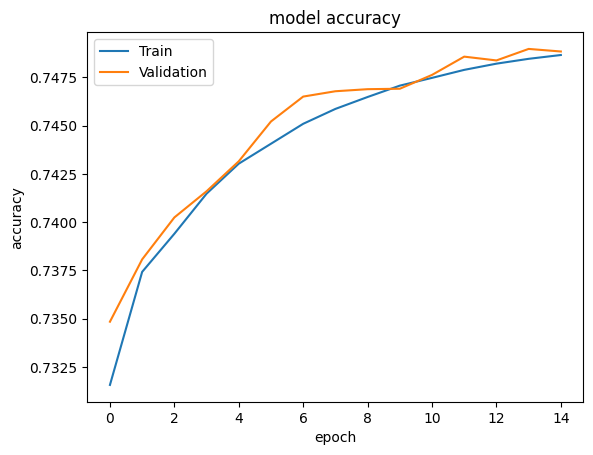

In [29]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

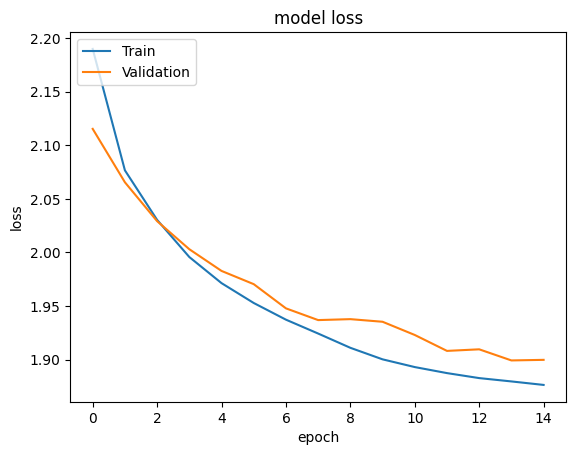

In [30]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
transformer_model.save('/content/drive/MyDrive/transformer_model_hindi')